Luis Aldair Hernandez Martinez 1616940
Estadistica aplicada 

In [1]:
!pip install lifelines

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [6]:
df = pd.read_excel('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/supervivencia_examenes.xlsx')

In [7]:
df

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


Separamos los sexos en data frame.

In [8]:
df_promcal = df['calificación'].mean()
df_promtiem = df['tiempo'].mean()
hombres = df[df['género'] == 'm']
mujeres = df[df['género'] == 'f']

#hombres
th = hombres['tiempo']
#exa_hom = hombres['examen']
ch = hombres['calificación']
th_prom = th.mean()
ch_prom = ch.mean()

#mujeres
tm = mujeres['tiempo']
#exa_muje = mujeres['examen']
cm = mujeres['calificación']
tm_prom = tm.mean()
cm_prom = cm.mean()

# a)

In [9]:
print(f'El promedio del tiempo en ambos sexos es de: {df_promtiem} y el promedio de las calificaciones en ambos sexos es de: {df_promcal}')
print(f'\n\nEl promedio del tiempo en las mujeres es de: {tm_prom}, el promedio del tiempo de los hombres es de: {th_prom}')
print(f'\n\nEl promedio de las calificaciones las mujeres es de: {cm_prom}, el promedio de las calificaciones de los hombres es de: {ch_prom}')

El promedio del tiempo en ambos sexos es de: 107.3529411764706 y el promedio de las calificaciones en ambos sexos es de: 90.70588235294117


El promedio del tiempo en las mujeres es de: 108.125, el promedio del tiempo de los hombres es de: 106.66666666666667


El promedio de las calificaciones las mujeres es de: 93.0, el promedio de las calificaciones de los hombres es de: 88.66666666666667



Al realizar los calculos podemos observar que las mujeres tienen un tiempo promedio mayor al de los hombres, por tanto la sospecha del maestro es equivocada

# b)

In [12]:
from lifelines import*
from lifelines import KaplanMeierFitter

In [13]:
kmf = KaplanMeierFitter()

,hombres
timeline,
0.0,1.000000
85.0,0.888889
87.0,0.777778
103.0,0.666667
109.0,0.555556
111.0,0.444444
112.0,0.333333
116.0,0.222222
118.0,0.111111


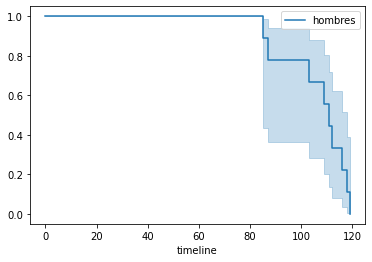

In [14]:
#Función de supervivencia para hombres
ax = plt.subplot(111)
kmf.fit(th,ch,label = "hombres").plot(ax=ax)
kmf.survival_function_

,mujeres
timeline,
0.0,1.000
90.0,0.875
99.0,0.750
106.0,0.625
108.0,0.375
115.0,0.250
119.0,0.125
120.0,0.000


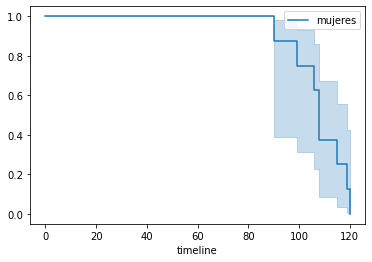

In [15]:
#Función de supervivencia de las mujeres
ax = plt.subplot(111)
kmf.fit(tm,cm,label = "mujeres").plot(ax=ax)
kmf.survival_function_

,hombres_lower_0.95,hombres_upper_0.95
0.0,1.000000,1.000000
85.0,0.432965,0.983564
87.0,0.364751,0.939296
103.0,0.281682,0.878307
109.0,0.204242,0.804525
111.0,0.135872,0.719315
112.0,0.078289,0.622627
116.0,0.033711,0.513068
118.0,0.006129,0.387665
119.0,0.000000,0.000000


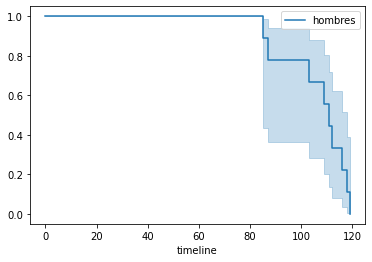

In [16]:
#Intervalos de confianza de los hombres
ax = plt.subplot(111)
kmf.fit(th,ch,label = "hombres").plot(ax=ax)
kmf.confidence_interval_

,mujeres_lower_0.95,mujeres_upper_0.95
0.0,1.000000,1.000000
90.0,0.387000,0.981393
99.0,0.314807,0.930898
106.0,0.229333,0.860698
108.0,0.087006,0.674363
115.0,0.037067,0.558084
119.0,0.006593,0.422706
120.0,0.000000,0.000000


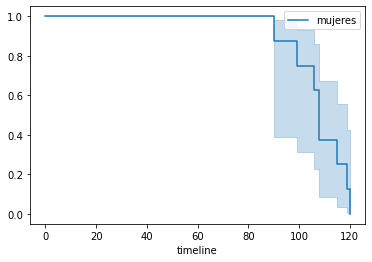

In [17]:
#Intervalos de confianza de las mujeres
ax = plt.subplot(111)
kmf.fit(tm,cm,label = "mujeres").plot(ax=ax)
kmf.confidence_interval_

# c)

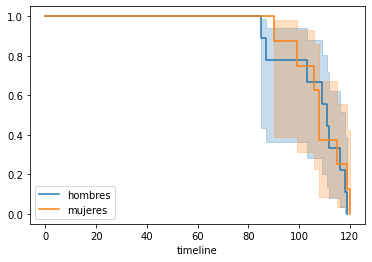

In [18]:
ax = plt.subplot(111)
ax = kmf.fit(th,ch,label = "hombres").plot(ax=ax)
ax = kmf.fit(tm,cm,label = "mujeres").plot(ax=ax)


No es posible que el profesor pueda tener razón porque hay intervarlos donde las mujeres se tardan más que los hombres.

# d)
H0: Las funciones de supervivencia de hombres y mujeres son iguales

H1: Las funciones de supervicencia de hombres y mujeres son distintas

In [19]:
from lifelines.statistics import logrank_test
results = logrank_test(th, tm, event_observed_A = ch, event_observed_B = cm)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

#### Como el p-valor es: 0.69 y es mayor a 0.05, no se rechaza la H0, por lo tanto las funciones de supervivencia de ambos sexos, son iguales.

# e)

Usamos Dummies


In [20]:
df = pd.get_dummies(df,columns=['género'], drop_first = True)
df

,id,tiempo,examen,calificación,género_m
0,1,85,1,100.0,1
1,2,109,1,100.0,1
2,3,118,1,100.0,1
3,4,120,1,100.0,0
4,5,106,1,98.0,0
5,6,103,1,98.0,1
6,7,108,1,96.0,0
7,8,119,1,96.0,0
8,9,115,1,96.0,0
9,10,108,1,94.0,0


In [21]:
cph = CoxPHFitter()
cph.fit(df, duration_col='tiempo', event_col='examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2022-05-11 03:59:14 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género_m       0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
género_m         0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

# H0: no afecta la variable 

# H1: afecta la variable

### Para la variable calificación no se rechaza la H0, por lo tanto no afecta a que sufras el evento de reprobar.

### Para la variable género male no se rechaza la H0, por lo tanto el genero no afecta a que sufras el evento de reprobar.

# g)

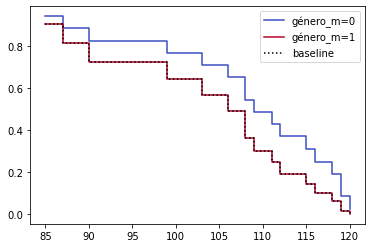

In [22]:
cph.plot_partial_effects_on_outcome(covariates='género_m', values=[0,1], cmap="coolwarm");

#### Haciendo la comparacion de ambos metodos podemos observar que son distintas, ya que en la primera se intercalan los eventos y con el 2do metodo (Cox) observamos que casi no hay contacto y solo en algunos puntos. Sin embargo, podemos observar que en ambas los hombres tienden a terminar el examen en menos tiempo.

# h)

#### Con base en la interpretación del modelo de cox y la significancia de los coeficientes concluimos que el maestro esta equivocado al señalar que las alumnas responden en menor tiempo el examen que los hombres, de igual manera los datos indican que el tiempo de entrega no tiene relacion con la calificación obtenida